In [1]:
#import liaberies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Capital One - Data Set (STEP UP).xlsx',index_col='CUSTOMER_ID')
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGION            9965 non-null   object 
 1   AGE               9960 non-null   float64
 2   PARENT            10000 non-null  int64  
 3   OCCUPATION        9958 non-null   object 
 4   MOBILE_APP_USER   9958 non-null   float64
 5   CARD_COLOUR       9960 non-null   object 
 6   CREDIT_LIMIT      10000 non-null  int64  
 7   SPEND_M1_TRAVEL   10000 non-null  float64
 8   SPEND_M1_GROCERY  10000 non-null  float64
 9   SPEND_M1_OTHER    10000 non-null  float64
 10  SPEND_M2_TRAVEL   10000 non-null  float64
 11  SPEND_M2_GROCERY  10000 non-null  float64
 12  SPEND_M2_OTHER    10000 non-null  float64
 13  SPEND_M3_TOTAL    10000 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGION            9805 non-null   object 
 1   AGE               9805 non-null   float64
 2   PARENT            9805 non-null   int64  
 3   OCCUPATION        9805 non-null   object 
 4   MOBILE_APP_USER   9805 non-null   float64
 5   CARD_COLOUR       9805 non-null   object 
 6   CREDIT_LIMIT      9805 non-null   int64  
 7   SPEND_M1_TRAVEL   9805 non-null   float64
 8   SPEND_M1_GROCERY  9805 non-null   float64
 9   SPEND_M1_OTHER    9805 non-null   float64
 10  SPEND_M2_TRAVEL   9805 non-null   float64
 11  SPEND_M2_GROCERY  9805 non-null   float64
 12  SPEND_M2_OTHER    9805 non-null   float64
 13  SPEND_M3_TOTAL    9805 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.1+ MB


In [6]:
print('Unique Age \n',df['AGE'].value_counts().sort_index(), '\n')

print('Unique Region\n',df['REGION'].value_counts(), '\n')

print('Unique OCCUPATION\n',df['OCCUPATION'].value_counts(), '\n')

print('Unique CARD_COLOUR\n',df['CARD_COLOUR'].value_counts(), '\n')

Unique Age 
 18.0    203
19.0     56
20.0     71
21.0     87
22.0     83
       ... 
95.0      3
96.0      2
97.0      3
98.0      2
99.0      6
Name: AGE, Length: 82, dtype: int64 

Unique Region
 England             8328
Scotland             763
Wales                434
Northern Ireland     280
Name: REGION, dtype: int64 

Unique OCCUPATION
 Employed         3804
Student          2258
Retired          1339
Unemployed       1326
Self-employed    1078
Name: OCCUPATION, dtype: int64 

Unique CARD_COLOUR
 Red      4697
Black    3548
Blue     1560
Name: CARD_COLOUR, dtype: int64 



In [7]:
df['TotalSpend (M1+M2+M3)'] = df[['SPEND_M1_TRAVEL','SPEND_M1_GROCERY','SPEND_M1_OTHER','SPEND_M2_TRAVEL','SPEND_M2_GROCERY','SPEND_M2_OTHER','SPEND_M3_TOTAL']].sum(axis=1)
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3)
CUSTOMER_ID,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02


In [8]:
df.columns

Index(['REGION', 'AGE', 'PARENT', 'OCCUPATION', 'MOBILE_APP_USER',
       'CARD_COLOUR', 'CREDIT_LIMIT', 'SPEND_M1_TRAVEL', 'SPEND_M1_GROCERY',
       'SPEND_M1_OTHER', 'SPEND_M2_TRAVEL', 'SPEND_M2_GROCERY',
       'SPEND_M2_OTHER', 'SPEND_M3_TOTAL', 'TotalSpend (M1+M2+M3)'],
      dtype='object')

In [9]:
df['Travel (M1+M2)'] = df[['SPEND_M1_TRAVEL','SPEND_M2_TRAVEL']].sum(axis=1)
df['Grocery (M1+M2)'] = df[['SPEND_M1_GROCERY','SPEND_M2_GROCERY']].sum(axis=1)
df['Grocery (M1+M2)'] = df[['SPEND_M1_GROCERY','SPEND_M2_GROCERY']].sum(axis=1)
df['Other'] = df[['SPEND_M1_OTHER','SPEND_M2_OTHER']].sum(axis=1)
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3),Travel (M1+M2),Grocery (M1+M2),Other
CUSTOMER_ID,,,,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94,14.35,29.64,12.44
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91,128.37,43.51,157.62
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31,68.97,116.23,26.78
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47,47.05,68.63,34.45
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72,492.29,0.00,210.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52,177.59,140.12,58.75
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08,87.93,49.59,76.58
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02,18.99,30.45,10.36


In [11]:
df.dtypes

REGION                    object
AGE                      float64
PARENT                     int64
OCCUPATION                object
MOBILE_APP_USER          float64
CARD_COLOUR               object
CREDIT_LIMIT               int64
SPEND_M1_TRAVEL          float64
SPEND_M1_GROCERY         float64
SPEND_M1_OTHER           float64
SPEND_M2_TRAVEL          float64
SPEND_M2_GROCERY         float64
SPEND_M2_OTHER           float64
SPEND_M3_TOTAL           float64
TotalSpend (M1+M2+M3)    float64
Travel (M1+M2)           float64
Grocery (M1+M2)          float64
Other                    float64
dtype: object

In [12]:
emp_group = df.groupby('OCCUPATION')['TotalSpend (M1+M2+M3)'].sum().sort_values(ascending = False)
emp_group

OCCUPATION
Employed         1750463.26
Student           768525.68
Unemployed        346336.27
Retired           327016.61
Self-employed     267601.15
Name: TotalSpend (M1+M2+M3), dtype: float64

In [13]:
credit_group = df.groupby(['OCCUPATION','CREDIT_LIMIT']).size()
occ_group = df.groupby('OCCUPATION').size() 
percentage = credit_group.div(occ_group, level='OCCUPATION') * 100
percentage = percentage.reset_index()
percentage.columns = ['Occupation', 'Credit Card Limit', 'Percentage']
print(percentage)

       Occupation  Credit Card Limit  Percentage
0        Employed                250   49.763407
1        Employed                500   31.519453
2        Employed               1000   18.717140
3         Retired                250   53.472741
4         Retired                500   32.038835
5         Retired               1000   14.488424
6   Self-employed                250   54.267161
7   Self-employed                500   28.014842
8   Self-employed               1000   17.717996
9         Student                250   50.531444
10        Student                500   30.558016
11        Student               1000   18.910540
12     Unemployed                250   55.203620
13     Unemployed                500   27.224736
14     Unemployed               1000   17.571644


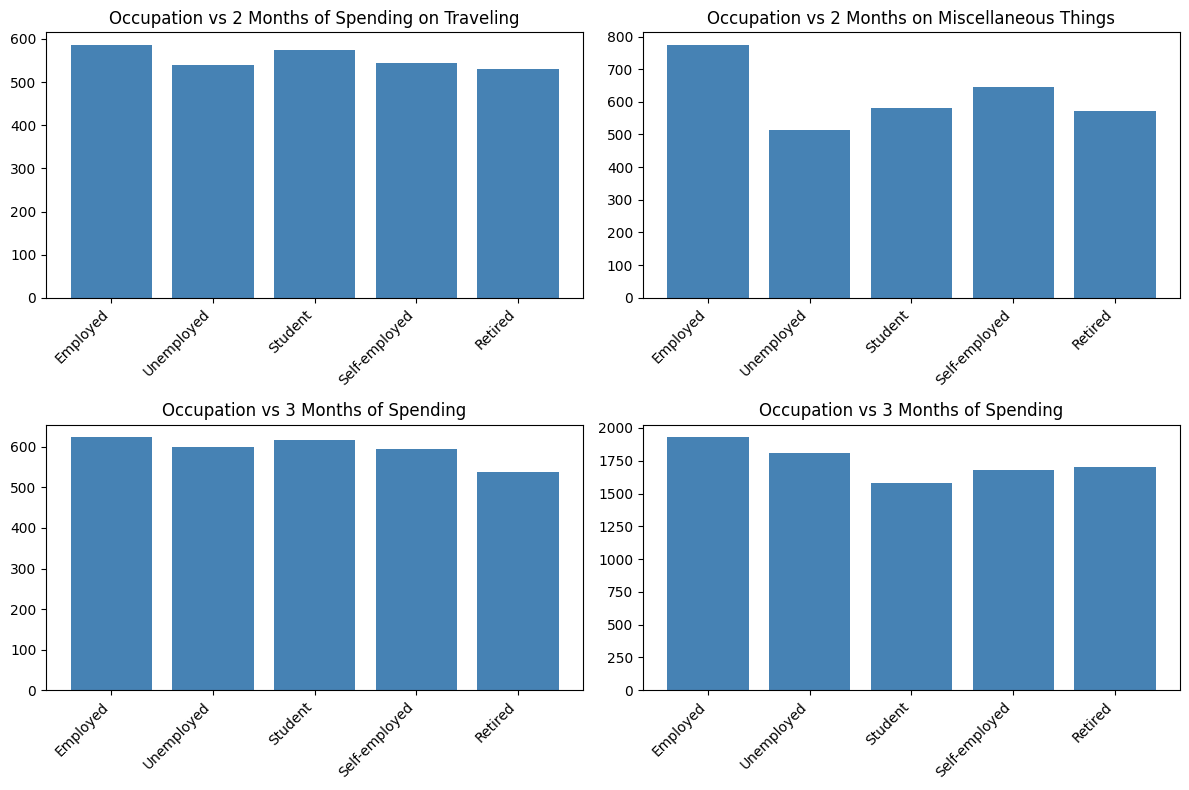

In [14]:
plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.bar(df['OCCUPATION'], df['Travel (M1+M2)'], color ='steelblue')
plt.title('Occupation vs 2 Months of Spending on Traveling')
plt.xticks(rotation=45, ha='right')

plt.subplot(222)
plt.bar(df['OCCUPATION'], df['Other'], color ='steelblue')
plt.title('Occupation vs 2 Months on Miscellaneous Things')
plt.xticks(rotation=45, ha='right')

plt.subplot(223)
plt.bar(df['OCCUPATION'], df['Grocery (M1+M2)'], color ='steelblue')
plt.title('Occupation vs 3 Months of Spending')
plt.xticks(rotation=45, ha='right')

plt.subplot(224)
plt.bar(df['OCCUPATION'], df['TotalSpend (M1+M2+M3)'], color ='steelblue')
plt.title('Occupation vs 3 Months of Spending')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show();


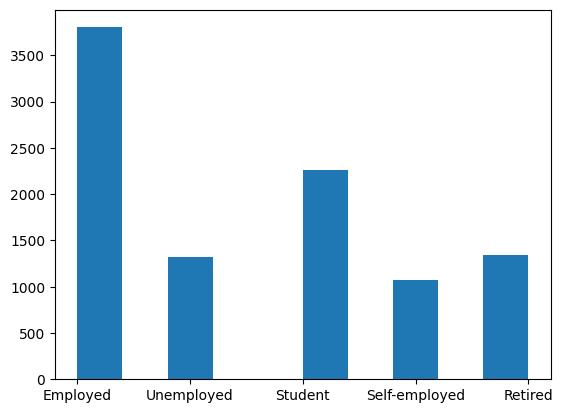

In [15]:
plt.hist(df['OCCUPATION'])
plt.show()

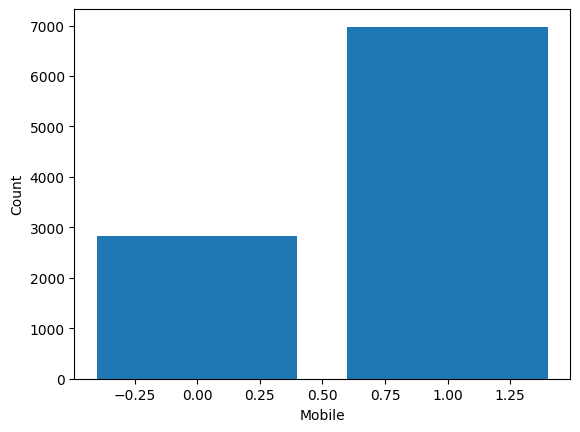

In [16]:
values = df['MOBILE_APP_USER'].value_counts().values
labels = df['MOBILE_APP_USER'].unique()

plt.bar(labels, values)
plt.xlabel('Mobile')
plt.ylabel('Count')

plt.show();

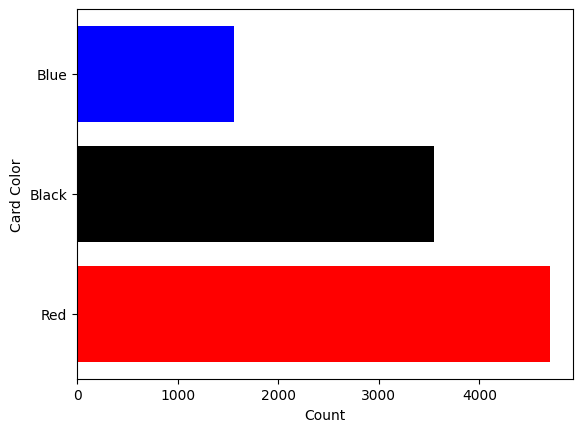

In [17]:
values = df['CARD_COLOUR'].value_counts().values
labels = df['CARD_COLOUR'].value_counts().index
y_pos = range(len(labels))

plt.barh(y_pos, values, color=['red', 'black', 'blue'])
plt.yticks(y_pos, labels)
plt.xlabel('Count')
plt.ylabel('Card Color')

plt.show()

In [18]:
card_group = df.groupby(['CARD_COLOUR', 'OCCUPATION']).size()
card_total = df.groupby('CARD_COLOUR').size()
percentage = card_group.div(card_total, level='CARD_COLOUR') * 100
percentage = percentage.reset_index()
percentage.columns = ['card Colour', 'Occupation', 'PERCENTAGE']
print(percentage)

   card Colour     Occupation  PERCENTAGE
0        Black       Employed   40.276212
1        Black        Retired   13.049605
2        Black  Self-employed   10.484780
3        Black        Student   23.196167
4        Black     Unemployed   12.993236
5         Blue       Employed   17.500000
6         Blue        Retired   22.307692
7         Blue  Self-employed   17.692308
8         Blue        Student   23.846154
9         Blue     Unemployed   18.653846
10         Red       Employed   44.751969
11         Red        Retired   11.241218
12         Red  Self-employed    9.154780
13         Red        Student   22.631467
14         Red     Unemployed   12.220566


In [19]:
region_group = df.groupby(['REGION', 'MOBILE_APP_USER']).size()
region_total = df.groupby('REGION').size()
percentage = region_group.div(region_total, level='REGION') * 100
percentage = percentage.reset_index()
percentage.columns = ['REGION', 'MOBILE_APP_USER', 'PERCENTAGE']
print(percentage)

             REGION  MOBILE_APP_USER  PERCENTAGE
0           England              0.0   29.094621
1           England              1.0   70.905379
2  Northern Ireland              0.0   26.785714
3  Northern Ireland              1.0   73.214286
4          Scotland              0.0   28.047182
5          Scotland              1.0   71.952818
6             Wales              0.0   26.958525
7             Wales              1.0   73.041475


In [20]:
occ_group = df.groupby(['OCCUPATION', 'MOBILE_APP_USER']).size()
occ_total = df.groupby('OCCUPATION').size()
percentage = occ_group.div(occ_total, level='OCCUPATION') * 100
percentage = percentage.reset_index()
percentage.columns = ['OCCUPATION', 'MOBILE_APP_USER', 'PERCENTAGE']
print(percentage)

      OCCUPATION  MOBILE_APP_USER  PERCENTAGE
0       Employed              0.0   23.396425
1       Employed              1.0   76.603575
2        Retired              0.0   57.356236
3        Retired              1.0   42.643764
4  Self-employed              0.0   30.983302
5  Self-employed              1.0   69.016698
6        Student              0.0   19.884854
7        Student              1.0   80.115146
8     Unemployed              0.0   29.260935
9     Unemployed              1.0   70.739065


In [21]:
parents_group = df.groupby(['REGION', 'PARENT']).size()
parents_total = df.groupby('REGION').size()
percentage = parents_group.div(parents_total, level='REGION') * 100
percentage = percentage.reset_index()
percentage.columns = ['REGION', 'Parent', 'Percentage']
print(percentage)

             REGION  Parent  Percentage
0           England       0   70.329011
1           England       1   29.670989
2  Northern Ireland       0   72.857143
3  Northern Ireland       1   27.142857
4          Scotland       0   70.773263
5          Scotland       1   29.226737
6             Wales       0   73.271889
7             Wales       1   26.728111


<Figure size 1000x500 with 0 Axes>

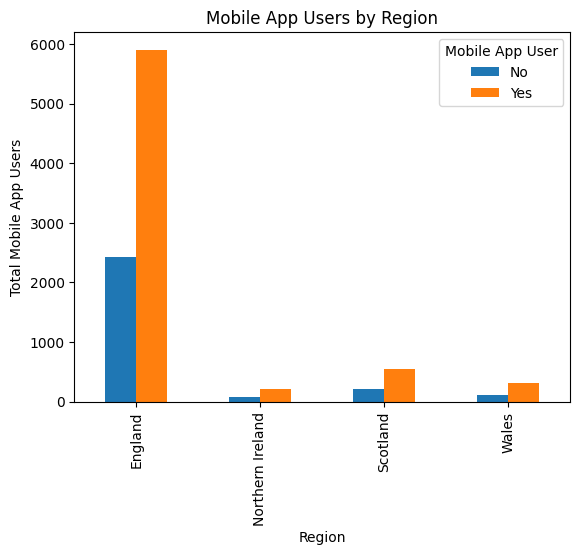

<Figure size 1000x500 with 0 Axes>

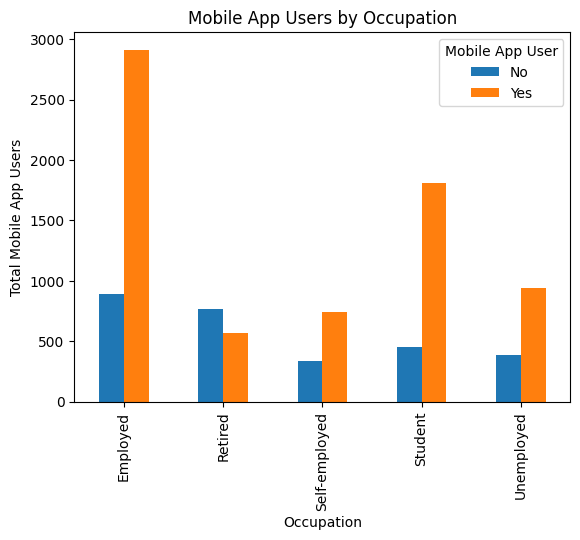

In [22]:
region_users = df.groupby('REGION')['MOBILE_APP_USER'].value_counts().unstack().fillna(0)

# Group by occupation and calculate the total mobile app users
occupation_users = df.groupby('OCCUPATION')['MOBILE_APP_USER'].value_counts().unstack().fillna(0)

# Plotting the graph for region-wise mobile app users
plt.figure(figsize=(10, 5))
region_users.plot(kind='bar')
plt.title('Mobile App Users by Region')
plt.xlabel('Region')
plt.ylabel('Total Mobile App Users')
plt.legend(title='Mobile App User', labels=['No', 'Yes'])
plt.show();

# Plotting the graph for occupation-wise mobile app users
plt.figure(figsize=(10, 5))
occupation_users.plot(kind='bar')
plt.title('Mobile App Users by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Mobile App Users')
plt.legend(title='Mobile App User', labels=['No', 'Yes'])
plt.show();

# Approach B

In [23]:
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3),Travel (M1+M2),Grocery (M1+M2),Other
CUSTOMER_ID,,,,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94,14.35,29.64,12.44
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91,128.37,43.51,157.62
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31,68.97,116.23,26.78
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47,47.05,68.63,34.45
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72,492.29,0.00,210.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52,177.59,140.12,58.75
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08,87.93,49.59,76.58
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02,18.99,30.45,10.36


In [24]:
df1 = df.drop(['SPEND_M1_TRAVEL', 'SPEND_M1_GROCERY',
       'SPEND_M1_OTHER', 'SPEND_M2_TRAVEL', 'SPEND_M2_GROCERY',
       'SPEND_M2_OTHER'], axis =1)
df1

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3),Travel (M1+M2),Grocery (M1+M2),Other
CUSTOMER_ID,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,30.51,86.94,14.35,29.64,12.44
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,20.41,349.91,128.37,43.51,157.62
2,England,28.0,1,Employed,1.0,Black,250,109.33,321.31,68.97,116.23,26.78
3,England,31.0,0,Unemployed,1.0,Black,500,50.34,200.47,47.05,68.63,34.45
4,England,47.0,1,Student,1.0,Black,1000,184.99,887.72,492.29,0.00,210.44
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,39.06,415.52,177.59,140.12,58.75
9996,England,81.0,0,Employed,1.0,Red,250,144.98,359.08,87.93,49.59,76.58
9997,England,18.0,0,Self-employed,1.0,Red,250,69.22,129.02,18.99,30.45,10.36


In [25]:
df1 = df1[['REGION', 'AGE', 'PARENT', 'OCCUPATION', 'MOBILE_APP_USER',
       'CARD_COLOUR', 'CREDIT_LIMIT', 'Travel (M1+M2)', 'Grocery (M1+M2)', 'Other', 'TotalSpend (M1+M2+M3)', 'SPEND_M3_TOTAL']]

df1

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,Travel (M1+M2),Grocery (M1+M2),Other,TotalSpend (M1+M2+M3),SPEND_M3_TOTAL
CUSTOMER_ID,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,14.35,29.64,12.44,86.94,30.51
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,128.37,43.51,157.62,349.91,20.41
2,England,28.0,1,Employed,1.0,Black,250,68.97,116.23,26.78,321.31,109.33
3,England,31.0,0,Unemployed,1.0,Black,500,47.05,68.63,34.45,200.47,50.34
4,England,47.0,1,Student,1.0,Black,1000,492.29,0.00,210.44,887.72,184.99
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,177.59,140.12,58.75,415.52,39.06
9996,England,81.0,0,Employed,1.0,Red,250,87.93,49.59,76.58,359.08,144.98
9997,England,18.0,0,Self-employed,1.0,Red,250,18.99,30.45,10.36,129.02,69.22


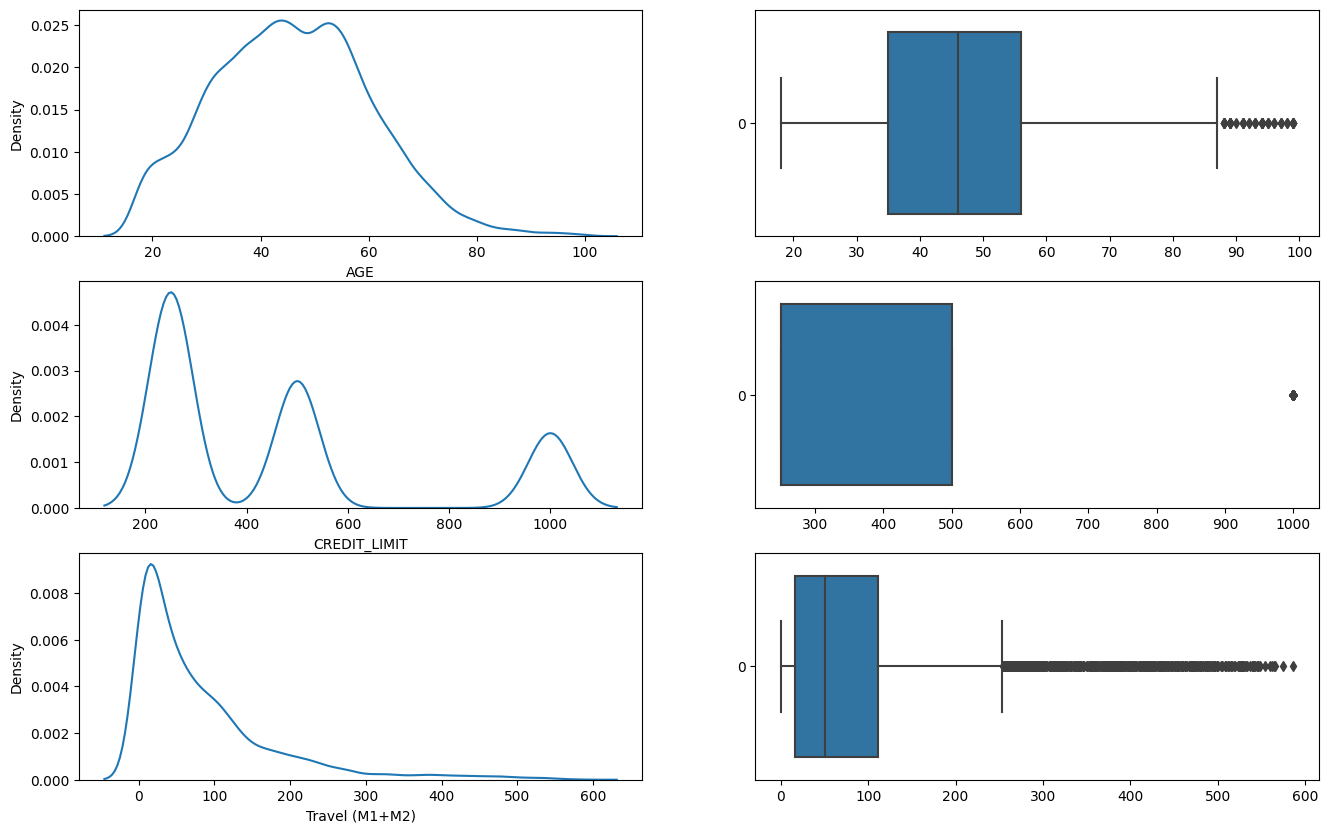

In [26]:
plt.figure(figsize=(16,10))


plt.subplot(3,2,1)
sns.kdeplot(df1['AGE'])

plt.subplot(3,2,2)
sns.boxplot(df['AGE'],orient='h')

plt.subplot(3,2,3)
sns.kdeplot(df1['CREDIT_LIMIT'])

plt.subplot(3,2,4)
sns.boxplot(df1['CREDIT_LIMIT'],orient='h')

plt.subplot(3,2,5)
sns.kdeplot(df1['Travel (M1+M2)'])

plt.subplot(3,2,6)
sns.boxplot(df1['Travel (M1+M2)'],orient='h')


plt.show()

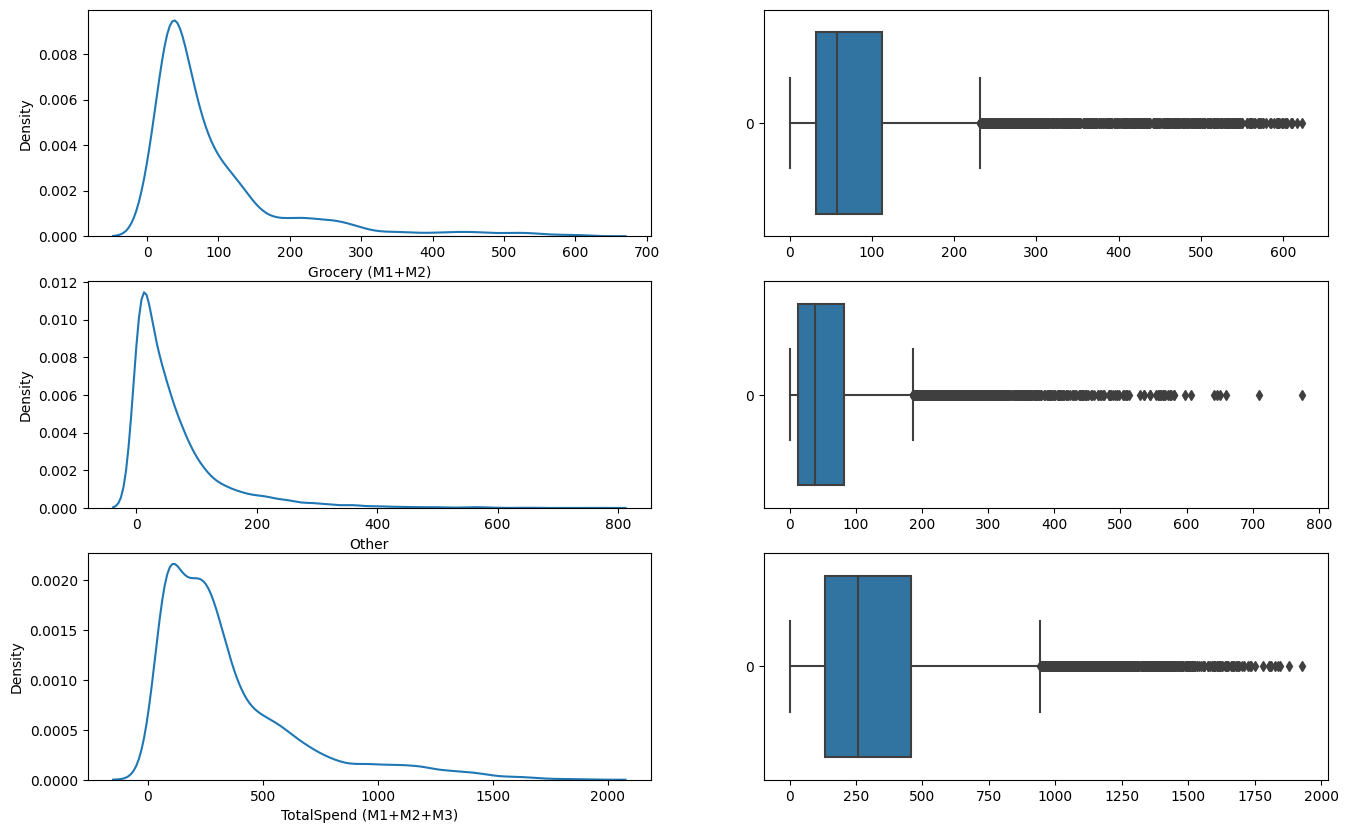

In [27]:
plt.figure(figsize=(16,10))

plt.subplot(3,2,1)
sns.kdeplot(df1['Grocery (M1+M2)'])

plt.subplot(3,2,2)
sns.boxplot(df1['Grocery (M1+M2)'],orient='h')

plt.subplot(3,2,3)
sns.kdeplot(df1['Other'])

plt.subplot(3,2,4)
sns.boxplot(df1['Other'],orient='h')

plt.subplot(3,2,5)
sns.kdeplot(df1['TotalSpend (M1+M2+M3)'])

plt.subplot(3,2,6)
sns.boxplot(df1['TotalSpend (M1+M2+M3)'],orient='h')

plt.show()

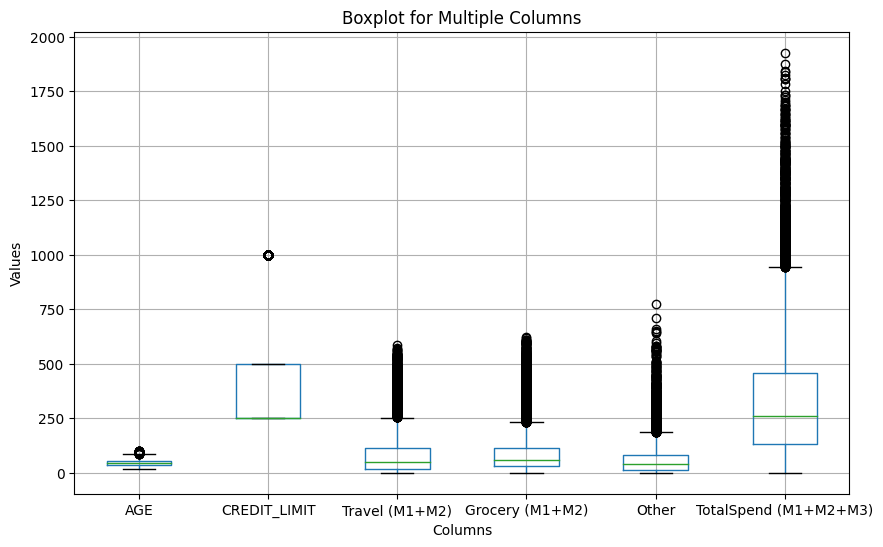

In [28]:
plt.figure(figsize=(10, 6))
df1.boxplot(column = ['AGE', 'CREDIT_LIMIT', 'Travel (M1+M2)', 'Grocery (M1+M2)', 'Other', 'TotalSpend (M1+M2+M3)'])
plt.title('Boxplot for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

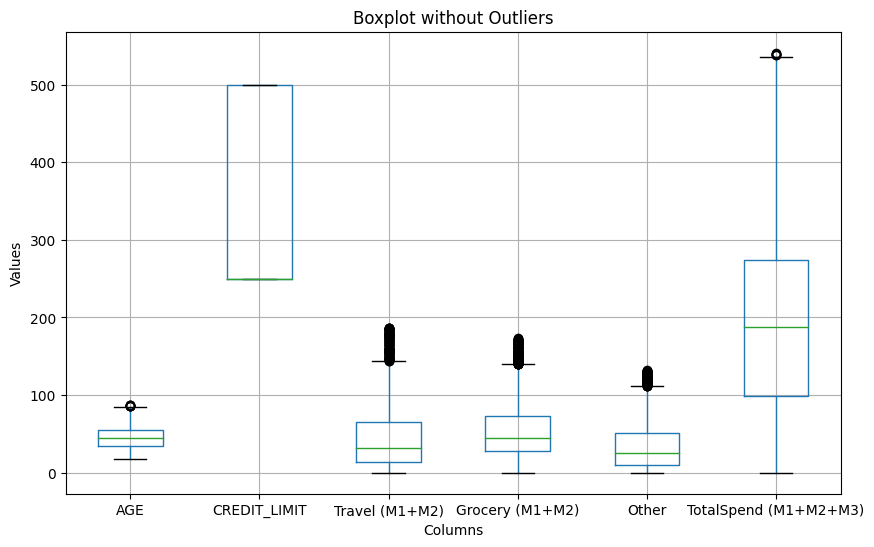

In [29]:
# Define the function to remove outliers using IQR
def remove_outliers(df1, columns):
    for column in columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

# Specify the columns to remove outliers from
columns = ['AGE', 'CREDIT_LIMIT', 'Travel (M1+M2)', 'Grocery (M1+M2)', 'Other', 'TotalSpend (M1+M2+M3)']

# Remove outliers from the specified columns
df1 = remove_outliers(df1, columns)

# Plot the boxplot for the columns without outliers
plt.figure(figsize=(10, 6))
df1.boxplot(column=columns)
plt.title('Boxplot without Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [30]:
df1

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,Travel (M1+M2),Grocery (M1+M2),Other,TotalSpend (M1+M2+M3),SPEND_M3_TOTAL
CUSTOMER_ID,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,14.35,29.64,12.44,86.94,30.51
2,England,28.0,1,Employed,1.0,Black,250,68.97,116.23,26.78,321.31,109.33
3,England,31.0,0,Unemployed,1.0,Black,500,47.05,68.63,34.45,200.47,50.34
5,Scotland,49.0,1,Self-employed,1.0,Red,250,88.64,106.53,29.48,294.93,70.28
6,England,59.0,0,Employed,1.0,Red,250,0.00,52.61,101.14,266.91,113.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Wales,40.0,0,Student,1.0,Blue,250,62.56,66.85,34.82,253.22,88.99
9996,England,81.0,0,Employed,1.0,Red,250,87.93,49.59,76.58,359.08,144.98
9997,England,18.0,0,Self-employed,1.0,Red,250,18.99,30.45,10.36,129.02,69.22


In [31]:
X = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Spending = ['CREDIT_LIMIT','TotalSpend (M1+M2+M3)','Travel (M1+M2)', 'Grocery (M1+M2)', 'Other']
Scaler = StandardScaler()
OHE = OneHotEncoder()

transformer = ColumnTransformer(transformers=[('tnf1', StandardScaler(), ['CREDIT_LIMIT','TotalSpend (M1+M2+M3)','Travel (M1+M2)', 'Grocery (M1+M2)', 'Other']),
                                            ('tnf2', OneHotEncoder(sparse=False,drop='first'),['REGION','OCCUPATION','CARD_COLOUR'])],remainder='passthrough')

In [34]:
X_train

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,Travel (M1+M2),Grocery (M1+M2),Other,TotalSpend (M1+M2+M3)
CUSTOMER_ID,,,,,,,,,,,
806,England,44.0,1,Unemployed,0.0,Black,250,67.87,103.22,45.42,283.08
4466,Wales,63.0,1,Unemployed,1.0,Red,250,15.97,21.85,11.09,55.96
2195,England,74.0,0,Retired,0.0,Red,250,62.79,62.68,94.43,303.34
5686,England,66.0,0,Self-employed,0.0,Red,250,21.05,40.96,15.36,83.83
439,England,62.0,0,Employed,0.0,Red,250,47.73,47.14,93.74,219.95
...,...,...,...,...,...,...,...,...,...,...,...
9594,England,52.0,1,Student,0.0,Black,250,73.42,91.58,52.93,287.17
5435,England,39.0,0,Employed,1.0,Black,250,12.07,43.13,16.58,107.03
8511,Wales,43.0,1,Unemployed,1.0,Blue,250,70.56,65.36,3.80,175.83


In [35]:
X_train1 = transformer.fit_transform(X_train)
X_test1 = transformer.fit_transform(X_test)

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
from sklearn.linear_model import LinearRegression
lor = LinearRegression()
lor.fit(X_train1,y_train)

LinearRegression()

In [37]:
y_predict = lor.predict(X_test1)
from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score for the Linear model is',r2_score(y_test,y_predict)*100,'%')

R2_Score for the Linear model is 99.4945764043121 %


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
DR = DecisionTreeRegressor()
DR.fit(X_train1, y_train)
y_pred1 = DR.predict(X_test1)
print('R2_Score for the Decision Tree',r2_score(y_test, y_pred1)*100,'%')

R2_Score for the Decision Tree 85.62936718007012 %


In [42]:
# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train1, y_train)
y_pred2 = rf.predict(X_test1)
print('R2_Score for the Random Forest',r2_score(y_test, y_pred2)*100,'%')

R2_Score for the Random Forest 93.61661554907121 %


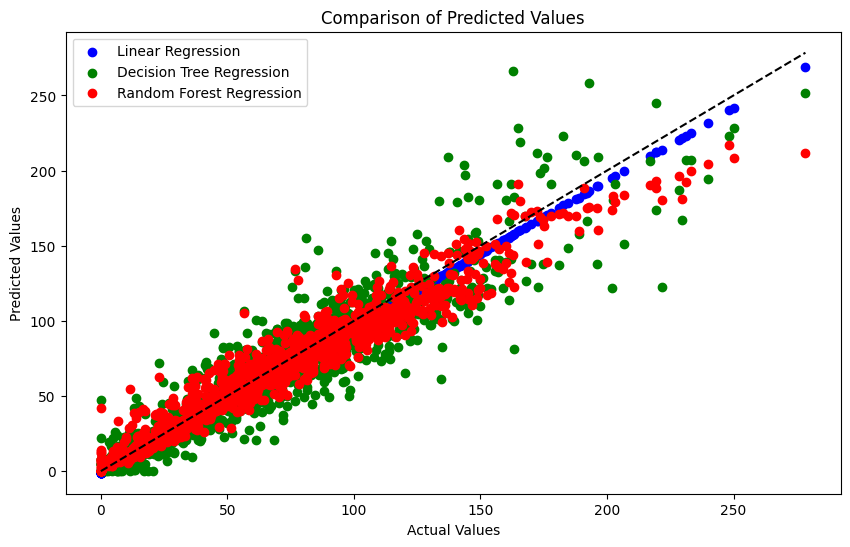

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred1, color='green', label='Decision Tree Regression')
plt.scatter(y_test, y_pred2, color='red', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()